In [1]:
from google.colab import files

In [3]:
file=files.upload()

Saving spam_or_ham.xlsx to spam_or_ham.xlsx


In [112]:
import pandas as pd 
import io

In [113]:
df2=pd.read_excel(io.BytesIO(file['spam_or_ham.xlsx']),names=['spam_or_ham','Email'])

In [114]:
df2.head()

,spam_or_ham,Email
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [115]:
df2.tail()

,spam_or_ham,Email
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ã¼ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...
5572,ham,Rofl. Its true to its name


In [116]:
df2.shape

(5573, 2)

In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   spam_or_ham  5573 non-null   object
 1   Email        5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [118]:
df2.isnull().sum()

spam_or_ham    0
Email          0
dtype: int64

In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   spam_or_ham  5573 non-null   object
 1   Email        5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [120]:
df2['spam_or_ham'].describe()

count     5573
unique       2
top        ham
freq      4826
Name: spam_or_ham, dtype: object

In [121]:
len(df2[df2['spam_or_ham']=='ham']), len(df2[df2['spam_or_ham']=='spam'])

(4826, 747)

In [122]:
ham_length=len(df2[df2['spam_or_ham']=='ham'])
spam_length=len(df2[df2['spam_or_ham']=='spam'])

In [123]:
print('Percentage of ham messages : ',round((((ham_length)/(ham_length+spam_length))*100),2))

Percentage of ham messages :  86.6


In [124]:
print('Percentage of spam messages : ',round((((spam_length)/(ham_length+spam_length))*100),2))

Percentage of spam messages :  13.4


In [125]:
import seaborn as sns

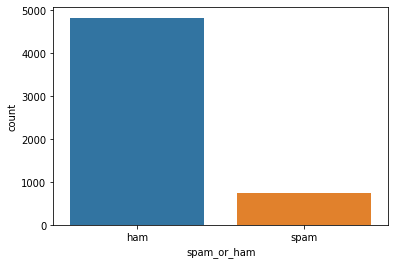

In [126]:
sns.countplot(df2['spam_or_ham'])

Clearly we observe that ham messages are more than spam messages

**FEATURE EXTRACTION OF EMAIL MESSAGES**

In [129]:
def lenn(sentence):
  
  len_exclude_space=0
  for i in sentence:
    if i!=' ':
      len_exclude_space+=1
  return len_exclude_space


In [130]:
df2['len_email']=df2['Email'].apply(lambda x: lenn(str(x)))

In [131]:
df2.head()

,spam_or_ham,Email,len_email
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives aro...",49
4,spam,FreeMsg Hey there darling it's been 3 week's n...,117


In [132]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [133]:
def punc_len(sentence):
  punc_lenn=0
  count=0

  for i in sentence:
    if i in string.punctuation:
      punc_lenn+=1
    if i!=' ':
      count+=1
  return round((punc_lenn/(count))*100,2)


In [134]:
df2['punc_per']=df2['Email'].apply(lambda x : punc_len(str(x)))

In [135]:
df2.head()

,spam_or_ham,Email,len_email,punc_per
0,ham,Ok lar... Joking wif u oni...,24,25.00
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.69
2,ham,U dun say so early hor... U c already then say...,39,15.38
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.08
4,spam,FreeMsg Hey there darling it's been 3 week's n...,117,6.84


In [137]:
df2['spam_or_ham']=df2['spam_or_ham'].replace({'ham':0,'spam':1})

In [138]:
df2.head()

,spam_or_ham,Email,len_email,punc_per
0,0,Ok lar... Joking wif u oni...,24,25.00
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.69
2,0,U dun say so early hor... U c already then say...,39,15.38
3,0,"Nah I don't think he goes to usf, he lives aro...",49,4.08
4,1,FreeMsg Hey there darling it's been 3 week's n...,117,6.84


In [139]:
df2.corr()

,spam_or_ham,len_email,punc_per
spam_or_ham,1.000000,0.405488,-0.131924
len_email,0.405488,1.000000,-0.153332
punc_per,-0.131924,-0.153332,1.000000


In [140]:
import seaborn as sns

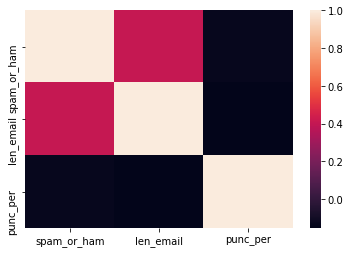

In [142]:
sns.heatmap(df2.corr())

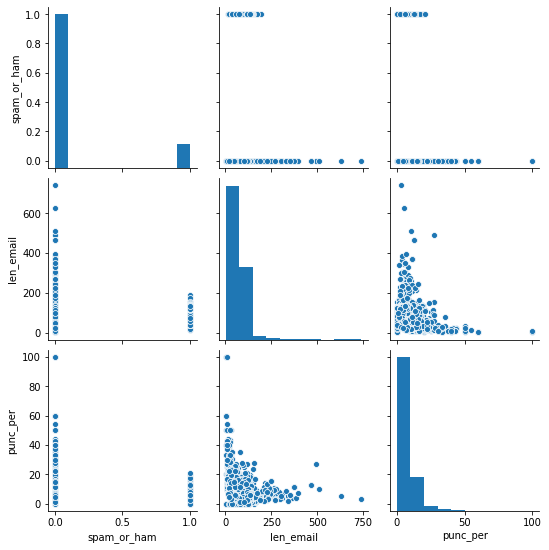

In [143]:
sns.pairplot(df2)

**TRAINING USING ML MODELS**

In [212]:
X=df2.iloc[:,2:4]
Y=df2.iloc[:,0:1]

In [213]:
X.head()

,len_email,punc_per
0,24,25.00
1,128,4.69
2,39,15.38
3,49,4.08
4,117,6.84


In [214]:
Y.head()

,spam_or_ham
0,0
1,1
2,0
3,0
4,1


In [215]:
from sklearn.model_selection import train_test_split

In [229]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=34)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [231]:
all_models=[LogisticRegression(),SVC(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

In [232]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [233]:
print('ACCURACY SCORE OF LOGISTIC REGRESSION : ')
for i in range(10):
  fitter=LogisticRegression()
  fitter.fit(x_train,y_train)
  b=fitter.predict(x_test)
  print(accuracy_score(b,y_test))

ACCURACY SCORE OF LOGISTIC REGRESSION : 
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121
0.8457675753228121


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [234]:
print('ACCURACY SCORE OF SVC : ')
for i in range(10):
  fitter=SVC()
  fitter.fit(x_train,y_train)
  b=fitter.predict(x_test)
  print(accuracy_score(b,y_test))

ACCURACY SCORE OF SVC : 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258
0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258
0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8837876614060258


In [235]:
print('ACCURACY SCORE OF GaussianNB : ')
for i in range(10):
  fitter=GaussianNB()
  fitter.fit(x_train,y_train)
  b=fitter.predict(x_test)
  print(accuracy_score(b,y_test))

ACCURACY SCORE OF GaussianNB : 
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959
0.8687230989956959


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [236]:
print('ACCURACY SCORE OF DecisionTree : ')
for i in range(10):
  fitter=DecisionTreeClassifier()
  fitter.fit(x_train,y_train)
  b=fitter.predict(x_test)
  print(accuracy_score(b,y_test))

ACCURACY SCORE OF DecisionTree : 
0.9038737446197992
0.9024390243902439
0.9045911047345767
0.9031563845050216
0.9024390243902439
0.9024390243902439
0.9031563845050216
0.9024390243902439
0.9038737446197992
0.9031563845050216


In [237]:
print('ACCURACY SCORE OF RandomForest : ')
for i in range(10):
  fitter=RandomForestClassifier()
  fitter.fit(x_train,y_train)
  b=fitter.predict(x_test)
  print(accuracy_score(b,y_test))

ACCURACY SCORE OF RandomForest : 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9031563845050216


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.906025824964132


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9045911047345767


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9067431850789096


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9010043041606887


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9074605451936872


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9081779053084649


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9010043041606887


In [239]:
print('ACCURACY SCORE OF GradientBoost : ')
for i in range(10):
  fitter=GradientBoostingClassifier()
  fitter.fit(x_train,y_train)
  b=fitter.predict(x_test)
  print(accuracy_score(b,y_test))

ACCURACY SCORE OF GradientBoost : 


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9038737446197992


**HERE WE CAN INFER THAT RANDOMFOREST , XGBOOST AND DECISION TREE PERFORM WELL WITH HIGHEST ACCURACY OF 90.38%**

In [241]:
confusion_matrix(b,y_test)

array([[1156,   74],
       [  60,  104]])